<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Binary_Classification_Weight_and_height_Homework%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading a Dataset

In [1]:
!wget https://raw.githubusercontent.com/Naxalov/matplotlib/master/scatter/weight-height.csv

--2023-06-22 02:26:13--  https://raw.githubusercontent.com/Naxalov/matplotlib/master/scatter/weight-height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [text/plain]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.007s  

2023-06-22 02:26:13 (62.5 MB/s) - ‘weight-height.csv’ saved [428120/428120]



In [2]:
!ls

sample_data  weight-height.csv


# Import Required Library

In [4]:
from torch import nn
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


# Load Dataset

In [5]:
dataset =pd.read_csv("/content/weight-height.csv")
dataset['Gender'] = np.where(dataset['Gender']=='Male', 1, 0)
dataset = dataset.to_numpy()

In [6]:
print(dataset)

[[  1.          73.84701702 241.89356318]
 [  1.          68.78190405 162.31047252]
 [  1.          74.11010539 212.74085556]
 ...
 [  0.          63.86799221 128.47531878]
 [  0.          69.03424313 163.85246135]
 [  0.          61.94424588 113.64910268]]


In [7]:
y = dataset[:, 0].reshape(-1, 1)
x = dataset[:, 1:]

In [8]:
x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

# Dataset Visualization

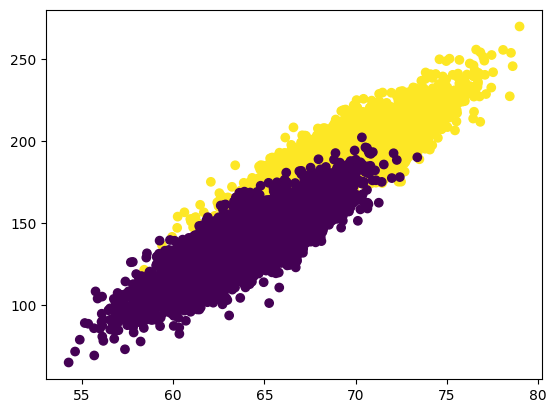

In [9]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# Train and Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Create Model

In [11]:
class Net(torch.nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=input, out_features=8)
        self.fc2 = torch.nn.Linear(in_features=8, out_features=output)
        self.act =torch.nn.Sigmoid()
        # self.relu = torch.nn.ReLU()
        # self.softmax =torch.nn.Softmax(dim=1)

        # Activation function

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)

        out = self.act(x)
        return out

In [12]:
model = Net(2, 1)

In [13]:
criterion = torch.nn.BCELoss()

lr = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

In [14]:
epochs=100
n = len(y_test)
for epoch in range(epochs):
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    y_hat = model(x_train)

    # get loss for the predicted output
    loss = criterion(y_hat, y_train)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    pred = model(x_test)
    acc = (sum((pred>.5)==y_test)/n)*100

    if epoch%5==0:
      print(f'epoch: {epoch+1} \t loss: {loss.item():.3f} \t acc: {acc.item():.1f}%')

epoch: 1 	 loss: 20.085 	 acc: 49.2%
epoch: 6 	 loss: 4.831 	 acc: 49.2%
epoch: 11 	 loss: 3.488 	 acc: 50.9%
epoch: 16 	 loss: 1.667 	 acc: 63.9%
epoch: 21 	 loss: 1.263 	 acc: 49.9%
epoch: 26 	 loss: 0.235 	 acc: 85.5%
epoch: 31 	 loss: 0.701 	 acc: 73.8%
epoch: 36 	 loss: 0.244 	 acc: 85.2%
epoch: 41 	 loss: 0.322 	 acc: 89.5%
epoch: 46 	 loss: 0.306 	 acc: 85.7%
epoch: 51 	 loss: 0.228 	 acc: 92.2%
epoch: 56 	 loss: 0.258 	 acc: 90.3%
epoch: 61 	 loss: 0.235 	 acc: 90.5%
epoch: 66 	 loss: 0.225 	 acc: 92.1%
epoch: 71 	 loss: 0.230 	 acc: 91.8%
epoch: 76 	 loss: 0.225 	 acc: 91.4%
epoch: 81 	 loss: 0.221 	 acc: 92.1%
epoch: 86 	 loss: 0.222 	 acc: 92.2%
epoch: 91 	 loss: 0.221 	 acc: 91.5%
epoch: 96 	 loss: 0.220 	 acc: 92.2%


In [15]:
pred = model(x_test)

In [16]:
pred = pred > 0.6

In [26]:
def get_confusion_matrix(pred, y_test):
  """
  Compute the confusion matrix based on predicted values and true labels.

  Args:
    preed: Prediction data
    y_test: True data

  Returns:
    tp: True positive
    tn: True negative
    fp: False positive
    fn: False negative
  """
  tp = torch.sum((pred == 1) & (y_test == 1))
  tn = torch.sum((pred == 0) & (y_test == 0))
  fp = torch.sum((pred == 1) & (y_test == 0))
  fn = torch.sum((pred == 0) & (y_test == 1))
  return tp, tn, fp, fn
  # WRITE CODE HERE

In [27]:
tp, tn, fp, fn = get_confusion_matrix(pred, y_test)

# For Example

In [28]:
confusion_m = torch.tensor(
    [[tp, fp],
     [fn, tn]])

In [29]:
print(confusion_m)

tensor([[1498,   99],
        [ 180, 1523]])


![Confusion Matrix](https://plat.ai/wp-content/uploads/Table1-2.png.webp)